In [1]:
import molsysmt as msm
import omembrane as omem
import openmm as mm
from openmm import unit as u
import numpy as np
import math
from matplotlib import pyplot as plt

In [2]:
upper_composition={'POPC':100}
lower_composition={'POPC':100}

In [3]:
length_x, length_y = omem.build.get_membrane_size_from_composition(lower_composition, upper_composition)

In [4]:
print(length_x, length_y)

82.64381404557754 A 82.64381404557754 A


In [5]:
upper_lipid_radius = []
upper_lipid_type = []
n_upper_lipids = 0
    
for name, nn in upper_composition.items():
        
    upper_lipid_type += [name for ii in range(nn)]
    upper_lipid_radius += [omem.lipid.get_radius(name) for ii in range(nn)]
    n_upper_lipids += nn

lower_lipid_radius = []
lower_lipid_type = []
n_lower_lipids = 0
    
for name, nn in lower_composition.items():
        
    lower_lipid_type += [name for ii in range(nn)]
    lower_lipid_radius += [omem.lipid.get_radius(name) for ii in range(nn)]
    n_lower_lipids += nn

In [6]:
upper_positions = omem.build.get_initial_random_seeds_leaf(upper_lipid_radius, length_x, length_y)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 111.80it/s]


In [7]:
lower_positions = omem.build.get_initial_random_seeds_leaf(lower_lipid_radius, length_x, length_y)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 110.61it/s]


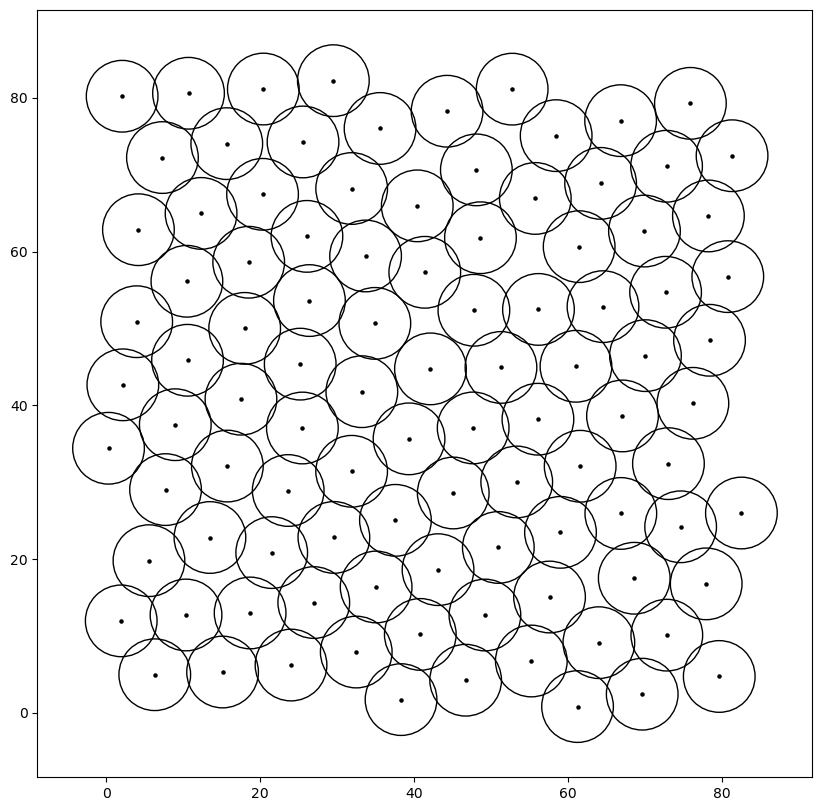

In [8]:
plt.rcParams["figure.figsize"] = (10,10)

ax=plt.gca()
for ii in range(n_upper_lipids):
    ax.add_patch(plt.Circle(10.0*upper_positions[ii,:]._value, radius= upper_lipid_radius[ii]._value, color='k', fill=False))

plt.scatter(10.0*upper_positions[:,0]._value, 10.0*upper_positions[:,1]._value, s=5, c='k')

plt.axis('scaled')

plt.show()

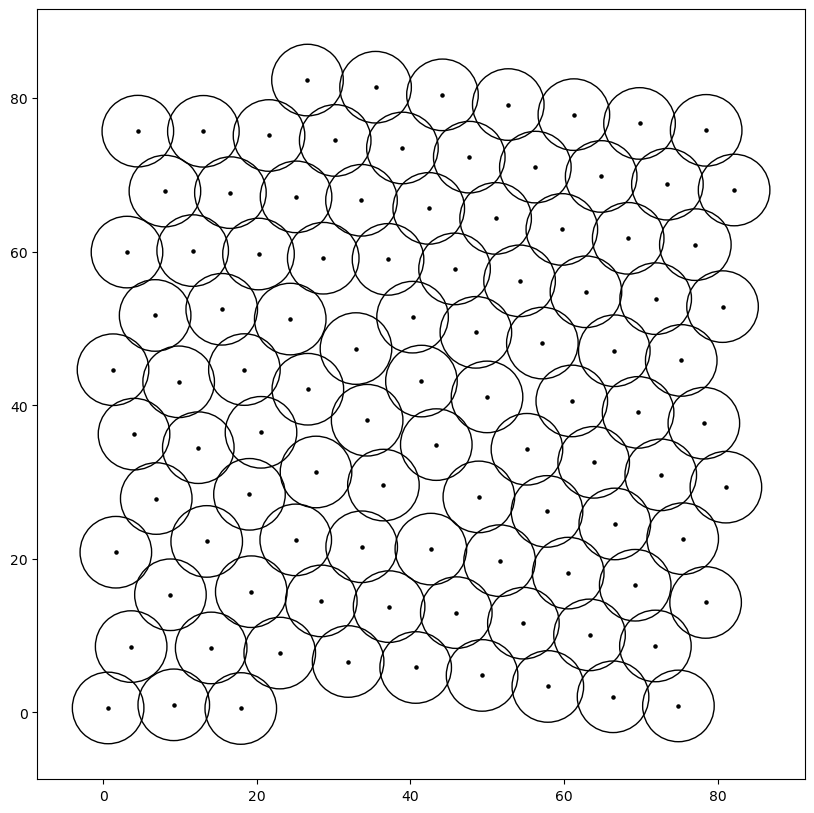

In [9]:
plt.rcParams["figure.figsize"] = (10,10)

ax=plt.gca()
for ii in range(n_lower_lipids):
    ax.add_patch(plt.Circle(10.0*lower_positions[ii,:]._value, radius= lower_lipid_radius[ii]._value, color='k', fill=False))
    
plt.scatter(10.0*lower_positions[:,0]._value, 10.0*lower_positions[:,1]._value, s=5, c='k')

plt.axis('scaled')

plt.show()

In [10]:
## Upper leaflet

upper_leafleat = None

lipids = omem.lipid.get_random_lipid('POPC', 100)

for lipid, position in zip(lipids, upper_positions):
    lipid = msm.structure.align_principal_axes(lipid, axes=[[0,0,1],[1,0,0],[0,1,0]])
    lipid = msm.structure.center(lipid, selection='all', center_of_selection='atom_name=="P"',
                             center_coordinates=position)
    if not omem.lipid.is_head_up(lipid):
        lipid = msm.structure.flip(lipid, vector=[0,0,1], point=position)
    if upper_leafleat is None:
        upper_leafleat = lipid
    else:
        msm.add(upper_leafleat, lipid)

In [11]:
msm.info(upper_leafleat)

form,n_atoms,n_groups,n_components,n_chains,n_molecules,n_entities,n_structures
molsysmt.MolSys,13400,100,99,100,99,1,1


In [12]:
msm.view(upper_leafleat)

NGLWidget()